<a href="https://colab.research.google.com/github/micheees/ftwprojects/blob/main/Model/model_overall_michelle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error as MSE, roc_auc_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
!pip install pydot
!pip install six
!pip install graphviz
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5ab2ea3f6e69d904d7bc72ee015f4d66d786a35af36e491385b3257c51f0c2c6
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5


In [ ]:
df = pd.read_csv('datav2.csv')
df.head()

,Unnamed: 0,Scholar_ID,Batch,Year_Graduated,Year_Disqualified,Scholarship_Status,Is_UPD,Is_Education,HS_Avg_Grade,HS_Sector,...,Class_Upper_Middle,No_of_Parents_Employed,Both_Parent_Unemployed,Only_One_Parent_Employed,Both_Parent_Employed,No_of_Siblings,Family_Size,Is_Fam_Size_Below_Ave,Siblings_3,Rounded_HS_Avg_Grade
0,0,2007001,2007.0,2011.0,NaN,Graduated,1,1,94.826667,Public,...,0,1,0,1,0,2.0,Below,1,1,95.0
1,1,2007002,2007.0,2011.0,NaN,Graduated,1,0,94.360000,Private,...,0,1,0,1,0,1.0,Below,1,1,94.0
2,2,2007003,2007.0,2011.0,NaN,Graduated,1,0,92.410667,Public,...,0,2,0,0,1,3.0,Average,0,2,92.0
3,3,2009004,2009.0,NaN,2011.0,Disqualified,1,1,86.500000,SUCs/LUCs,...,0,1,0,1,0,2.0,Below,1,1,86.0
4,4,2009005,2009.0,2014.0,NaN,Graduated,1,1,88.770000,Private,...,0,2,0,0,1,2.0,Below,1,1,89.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Scholar_ID', 'Batch', 'Year_Graduated',
       'Year_Disqualified', 'Scholarship_Status', 'Is_UPD', 'Is_Education',
       'HS_Avg_Grade', 'HS_Sector', 'HS_Private', 'HS_Public', 'HS_SUCs/LUCs',
       'School_Location', 'School_Within_Municipality/City',
       'School_Within_Province', 'Location', 'Municipality/City', 'Province',
       'Region', 'Is_More_Urbanized_Location', 'Annual_Family_Income',
       'Percent_of_Income_Cutoff', 'Income_Class', 'Income_Class_3',
       'Class_Poor', 'Class_Lower', 'Class_Lower_Middle',
       'Class_Middle_Middle', 'Class_Upper_Middle', 'No_of_Parents_Employed',
       'Both_Parent_Unemployed', 'Only_One_Parent_Employed',
       'Both_Parent_Employed', 'No_of_Siblings', 'Family_Size',
       'Is_Fam_Size_Below_Ave', 'Siblings_3', 'Rounded_HS_Avg_Grade'],
      dtype='object')

In [ ]:
feat = df[['Scholarship_Status', 'Is_UPD', 'Percent_of_Income_Cutoff', 'Is_More_Urbanized_Location','School_Location','Is_Fam_Size_Below_Ave','HS_Private','HS_Avg_Grade' ]]

In [ ]:
feat.head()

,Scholarship_Status,Is_UPD,Percent_of_Income_Cutoff,Is_More_Urbanized_Location,School_Location,Is_Fam_Size_Below_Ave,HS_Private,HS_Avg_Grade
0,Graduated,1,0.522242,0,3,1,0,94.826667
1,Graduated,1,0.120000,1,2,1,1,94.360000
2,Graduated,1,0.430000,1,1,0,0,92.410667
3,Disqualified,1,1.067593,1,1,1,0,86.500000
4,Graduated,1,1.533333,1,2,1,1,88.770000


In [ ]:
oa = feat[feat['Scholarship_Status']!='Ongoing']

In [ ]:
oa.head()

,Scholarship_Status,Is_UPD,Percent_of_Income_Cutoff,Is_More_Urbanized_Location,School_Location,Is_Fam_Size_Below_Ave,HS_Private,HS_Avg_Grade
0,Graduated,1,0.522242,0,3,1,0,94.826667
1,Graduated,1,0.120000,1,2,1,1,94.360000
2,Graduated,1,0.430000,1,1,0,0,92.410667
3,Disqualified,1,1.067593,1,1,1,0,86.500000
4,Graduated,1,1.533333,1,2,1,1,88.770000


In [ ]:
oa['Scholarship_Status'] = np.where((oa['Scholarship_Status']=='Graduated')==True, 1, 0)

<ipython-input-8-cc62dfccd32a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oa['Scholarship_Status'] = np.where((oa['Scholarship_Status']=='Graduated')==True, 1, 0)


In [ ]:
oa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 195
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Scholarship_Status          145 non-null    int64  
 1   Is_UPD                      145 non-null    int64  
 2   Percent_of_Income_Cutoff    145 non-null    float64
 3   Is_More_Urbanized_Location  145 non-null    int64  
 4   School_Location             145 non-null    int64  
 5   Is_Fam_Size_Below_Ave       145 non-null    int64  
 6   HS_Private                  145 non-null    int64  
 7   HS_Avg_Grade                145 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 10.2 KB


In [ ]:
oa.head()

,Scholarship_Status,Is_UPD,Percent_of_Income_Cutoff,Is_More_Urbanized_Location,School_Location,Is_Fam_Size_Below_Ave,HS_Private,HS_Avg_Grade
0,1,1,0.522242,0,3,1,0,94.826667
1,1,1,0.120000,1,2,1,1,94.360000
2,1,1,0.430000,1,1,0,0,92.410667
3,0,1,1.067593,1,1,1,0,86.500000
4,1,1,1.533333,1,2,1,1,88.770000


In [ ]:
oa.columns

Index(['Scholarship_Status', 'Is_UPD', 'Percent_of_Income_Cutoff',
       'Is_More_Urbanized_Location', 'School_Location',
       'Is_Fam_Size_Below_Ave', 'HS_Private', 'HS_Avg_Grade'],
      dtype='object')

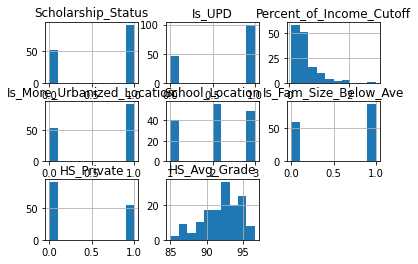

In [ ]:
oa.hist()
pyplot.show()

## Split

In [ ]:
X = oa.drop('Scholarship_Status',axis=1)
y = oa['Scholarship_Status']

In [ ]:
X

,Is_UPD,Percent_of_Income_Cutoff,Is_More_Urbanized_Location,School_Location,Is_Fam_Size_Below_Ave,HS_Private,HS_Avg_Grade
0,1,0.522242,0,3,1,0,94.826667
1,1,0.120000,1,2,1,1,94.360000
2,1,0.430000,1,1,0,0,92.410667
3,1,1.067593,1,1,1,0,86.500000
4,1,1.533333,1,2,1,1,88.770000
...,...,...,...,...,...,...,...
159,0,0.216000,0,2,0,0,95.850000
168,1,0.184000,1,2,1,0,94.500000
172,1,0.088000,1,2,0,0,96.155000
191,0,0.070000,1,1,1,0,95.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 1, stratify = y)

In [ ]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
feature_list = list(oa.columns)[1:]
features = list(feature_list)

In [ ]:
features

['Is_UPD',
 'Percent_of_Income_Cutoff',
 'Is_More_Urbanized_Location',
 'School_Location',
 'Is_Fam_Size_Below_Ave',
 'HS_Private',
 'HS_Avg_Grade']

In [ ]:
X_train

,Is_UPD,Percent_of_Income_Cutoff,Is_More_Urbanized_Location,School_Location,Is_Fam_Size_Below_Ave,HS_Private,HS_Avg_Grade
70,0,0.1920,0,1,1,0,92.50
90,0,0.3952,0,2,1,1,89.12
28,1,0.3040,1,1,1,0,89.50
94,0,0.2000,0,3,0,0,86.08
60,0,0.2400,0,2,1,0,86.66
...,...,...,...,...,...,...,...
124,0,0.3648,0,1,0,0,90.00
113,1,1.1712,1,3,1,0,91.00
93,0,0.2400,0,2,0,1,91.46
73,0,0.1440,1,1,1,0,93.00


## Decision Tree Overall

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 3, max_depth = 4, random_state = 1)

*  leaf 5, depth 3 0.6 (0.47)



In [ ]:
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.40      0.81      0.54        27
           1       0.72      0.28      0.41        46

    accuracy                           0.48        73
   macro avg       0.56      0.55      0.47        73
weighted avg       0.60      0.48      0.45        73



In [ ]:
print(confusion_matrix(y_test,predictions))

[[22  5]
 [33 13]]


In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)

ROC Curve:


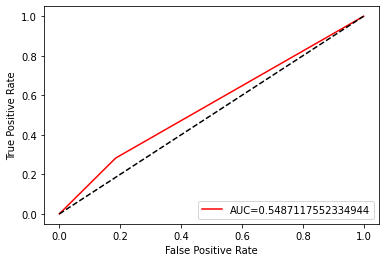

In [ ]:
print('ROC Curve:')
plt.plot(fpr,tpr,label="AUC="+str(auc), color='red')
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
print()

In [ ]:
feat = df[['Scholarship_Status', 'Is_UPD','Percent_of_Income_Cutoff', 'Is_More_Urbanized_Location','School_Location','Is_Fam_Size_Below_Ave','Rounded_HS_Avg_Grade','HS_Public']]

In [ ]:
features

['Is_UPD',
 'Percent_of_Income_Cutoff',
 'Is_More_Urbanized_Location',
 'School_Location',
 'Is_Fam_Size_Below_Ave',
 'HS_Private',
 'HS_Avg_Grade']

In [ ]:
imp_dtree = dtree.feature_importances_
indices = np.argsort(imp_dtree)
ranked_index_dtree = [feature_list[i] for i in indices]

In [ ]:
ranked_index_dtree

['Is_UPD',
 'Percent_of_Income_Cutoff',
 'Is_More_Urbanized_Location',
 'Is_Fam_Size_Below_Ave',
 'HS_Private',
 'School_Location',
 'HS_Avg_Grade']

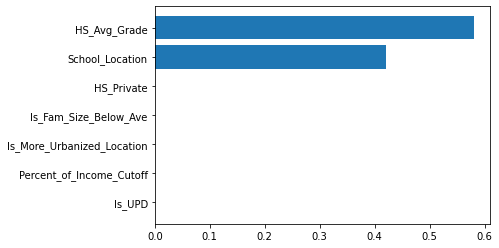

In [ ]:
fig, ax = plt.subplots()
ax.barh(range(len(imp_dtree)), imp_dtree[indices])
ax.set_yticks(range(len(imp_dtree)))
_ = ax.set_yticklabels(np.array(X.columns)[indices])

In [ ]:
# Evaluate test-set accuracy
train_accuracy_dtree= accuracy_score(y_train, dtree.predict(X_train))
test_accuracy_dtree = accuracy_score(y_test, predictions)

# Compare train and test accuracy
print("Logistic Regression Train Accuracy Baseline: {:.3f}".format(train_accuracy_dtree))
print("Logistic Regression Test Accuracy Baseline: {:.3f}".format(test_accuracy_dtree))
print()
print(np.where(train_accuracy_dtree < test_accuracy_dtree,'Testing Accuracy > Training Accuracy = underfitting',
               np.where(train_accuracy_dtree > test_accuracy_dtree,'Testing Accuracy < Training Accuracy = overfitting','Testing and training accuracy is the same')))
print("Difference between test and train accuracy: {:.3f}".format(test_accuracy_dtree- train_accuracy_dtree))
print()
print()

Logistic Regression Train Accuracy Baseline: 0.653
Logistic Regression Test Accuracy Baseline: 0.479

Testing Accuracy < Training Accuracy = overfitting
Difference between test and train accuracy: -0.173




## KNN Overall

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=3)

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45        27
           1       0.69      0.76      0.72        46

    accuracy                           0.63        73
   macro avg       0.59      0.58      0.59        73
weighted avg       0.62      0.63      0.62        73



In [ ]:
print(confusion_matrix(y_test,knn_pred))

[[11 16]
 [11 35]]


In [ ]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn2, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

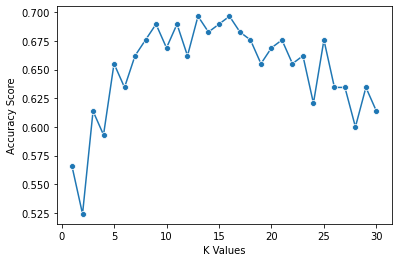

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  knn_pred)
auc_knn = metrics.roc_auc_score(y_test, knn_pred)

ROC Curve (KNN):


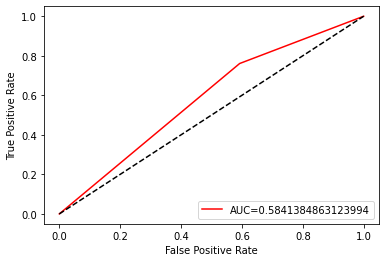

In [ ]:
print('ROC Curve (KNN):')
plt.plot(fpr_knn,tpr_knn,label="AUC="+str(auc_knn), color='red')
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
print()

In [ ]:
knn.fit(X_train, y_train)
# Evaluate test-set accuracy
train_accuracy_knn= accuracy_score(y_train, knn.predict(X_train))
test_accuracy_knn = accuracy_score(y_test, knn_pred)

# Compare train and test accuracy
print("Logistic Regression Train Accuracy Baseline: {:.3f}".format(train_accuracy_knn))
print("Logistic Regression Test Accuracy Baseline: {:.3f}".format(test_accuracy_knn))
print()
print(np.where(train_accuracy_knn < test_accuracy_knn,'Testing Accuracy > Training Accuracy = underfitting',
               np.where(train_accuracy_knn > test_accuracy_knn,'Testing Accuracy < Training Accuracy = overfitting','Testing and training accuracy is the same')))
print("Difference between test and train accuracy: {:.3f}".format(test_accuracy_knn - train_accuracy_knn))
print()
print()

Logistic Regression Train Accuracy Baseline: 0.736
Logistic Regression Test Accuracy Baseline: 0.630

Testing Accuracy < Training Accuracy = overfitting
Difference between test and train accuracy: -0.106




In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(knn, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

AttributeError: ignored

## Stacking

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=5, min_samples_split=10, random_state=1)),
    ('knn', KNeighborsClassifier(n_neighbors=4)),
    ('gbdt',GradientBoostingClassifier())
]

n estimators 3, neighbors 5, 0.66 auc 0.5829

In [ ]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf_pred)

0.6712328767123288

In [ ]:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.62      0.30      0.40        27
           1       0.68      0.89      0.77        46

    accuracy                           0.67        73
   macro avg       0.65      0.59      0.59        73
weighted avg       0.66      0.67      0.64        73



In [ ]:
print(confusion_matrix(y_test,clf_pred))

[[ 8 19]
 [ 5 41]]


In [ ]:
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test, clf_pred)
auc_clf = metrics.roc_auc_score(y_test, clf_pred)

ROC Curve (CLF):


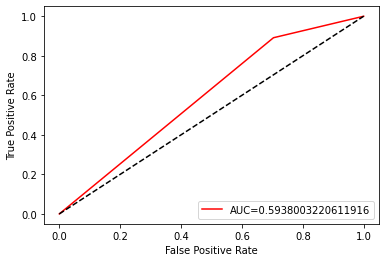

In [ ]:
print('ROC Curve (CLF):')
plt.plot(fpr_clf,tpr_clf,label="AUC="+str(auc_clf), color='red')
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
print()

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1639 ± 0.0643,Percent_of_Income_Cutoff
0.1361 ± 0.0754,School_Location
0.0889 ± 0.0515,HS_Private
0.0639 ± 0.0416,Rounded_HS_Avg_Grade
0.0306 ± 0.0272,Is_Fam_Size_Below_Ave
0.0083 ± 0.0222,Is_UPD
0.0056 ± 0.0283,Is_More_Urbanized_Location


In [ ]:
# Evaluate test-set accuracy
train_accuracy_clf= accuracy_score(y_train, clf.predict(X_train))
test_accuracy_clf = accuracy_score(y_test, clf_pred)

# Compare train and test accuracy
print("Logistic Regression Train Accuracy Baseline: {:.3f}".format(train_accuracy_clf))
print("Logistic Regression Test Accuracy Baseline: {:.3f}".format(test_accuracy_clf))
print()
print(np.where(train_accuracy_clf < test_accuracy_clf,'Testing Accuracy > Training Accuracy = underfitting',
               np.where(train_accuracy_clf > test_accuracy_clf,'Testing Accuracy < Training Accuracy = overfitting','Testing and training accuracy is the same')))
print("Difference between test and train accuracy: {:.3f}".format(test_accuracy_clf - train_accuracy_clf))
print()
print()

Logistic Regression Train Accuracy Baseline: 0.875
Logistic Regression Test Accuracy Baseline: 0.671

Testing Accuracy < Training Accuracy = overfitting
Difference between test and train accuracy: -0.204




## Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 6, max_features = 6, random_state =1)

nestimators = 5, max feat = 2 0.7 

In [ ]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

Estimators 3, Features 4 0.64
Estimators 3 Features 5 0.64, 0.617
Estimators 3, Features 2 0.64 0.656

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.55      0.41      0.47        27
           1       0.70      0.80      0.75        46

    accuracy                           0.66        73
   macro avg       0.62      0.61      0.61        73
weighted avg       0.64      0.66      0.64        73



In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[11 16]
 [ 9 37]]


In [ ]:
fpr_rfc, tpr_rfc, _ = metrics.roc_curve(y_test, rfc_pred)
auc_rfc = metrics.roc_auc_score(y_test, rfc_pred)

ROC Curve (RFC):


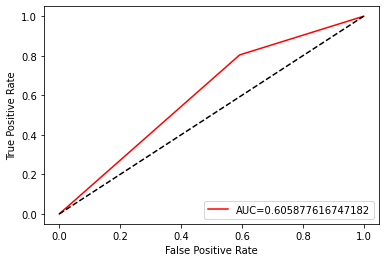

In [ ]:
print('ROC Curve (RFC):')
plt.plot(fpr_rfc,tpr_rfc,label="AUC="+str(auc_rfc), color='red')
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
print()

In [ ]:
imp_rfc = rfc.feature_importances_
indices_rfc = np.argsort(imp_rfc)
ranked_index = [feature_list[i] for i in indices_rfc]

In [ ]:
ranked_index

['Both_Parent_Unemployed',
 'Is_Fam_Size_Below_Ave',
 'Is_UPD',
 'HS_Private',
 'Is_More_Urbanized_Location',
 'School_Location',
 'HS_Avg_Grade',
 'Percent_of_Income_Cutoff']

In [ ]:
indices_rfc

array([6, 4, 0, 5, 2, 3, 7, 1])

In [ ]:
feature_list

['Is_UPD',
 'Percent_of_Income_Cutoff',
 'Is_More_Urbanized_Location',
 'School_Location',
 'Is_Fam_Size_Below_Ave',
 'HS_Private',
 'Both_Parent_Unemployed',
 'HS_Avg_Grade']

In [ ]:
imp_rfc

array([0.04321749, 0.46499533, 0.08270893, 0.10682708, 0.03738862,
       0.047119  , 0.01326675, 0.20447681])

In [ ]:
# Evaluate test-set accuracy
train_accuracy_rfc= accuracy_score(y_train, rfc.predict(X_train))
test_accuracy_rfc = accuracy_score(y_test, rfc_pred)

# Compare train and test accuracy
print("Logistic Regression Train Accuracy Baseline: {:.3f}".format(train_accuracy_rfc))
print("Logistic Regression Test Accuracy Baseline: {:.3f}".format(test_accuracy_rfc))
print()
print(np.where(train_accuracy_rfc < test_accuracy_rfc,'Testing Accuracy > Training Accuracy = underfitting',
               np.where(train_accuracy_rfc > test_accuracy_rfc,'Testing Accuracy < Training Accuracy = overfitting','Testing and training accuracy is the same')))
print("Difference between test and train accuracy: {:.3f}".format(test_accuracy_rfc - train_accuracy_rfc))
print()
print()

Logistic Regression Train Accuracy Baseline: 0.889
Logistic Regression Test Accuracy Baseline: 0.658

Testing Accuracy < Training Accuracy = overfitting
Difference between test and train accuracy: -0.231




In [ ]:
X.columns

AttributeError: ignored

In [ ]:
fig, ax = plt.subplots()
ax.barh(range(len(imp_rfc)), imp_rfc[indices])
ax.set_yticks(range(len(imp_rfc)))
_ = ax.set_yticklabels(np.array(X.columns)[indices])